<a href="https://colab.research.google.com/github/SithmiDesilva/Bank_Marketing_Prediction/blob/main/Bank_Marketing_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Read Dataset
data=pd.read_csv("/content/drive/MyDrive/Machine Learning CW/bank-additional-full.csv",sep=";")
data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Tail
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [ ]:
# Sanity check by checking the shape
data.shape

(41188, 21)

In [ ]:
# Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# Finding dupicate values
data.duplicated().sum()

12

In [ ]:
# Handle duplicate values
clean_data=data.drop_duplicates()

In [ ]:
print("Clean Shape:",clean_data.shape)
clean_data.head()

Clean Shape: (41176, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
clean_data.duplicated().sum()

0

In [ ]:
# Identifying garbage values (Garbage values are always in the form of objects)
for i in clean_data.select_dtypes(include='object').columns:
  print(clean_data[i].value_counts()) # 'value_counts()' checks the garbage value
  print("***"*10)

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
******************************
marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64
******************************
education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64
******************************
default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64
******************************
housing
yes        21571
no         18615
unknown      990
Name: count, dtype: int64
**************************

In [ ]:
# Descriptive statistics
clean_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
duration,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41176.0,0.081922,1.570883,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,1.344,4.857,4.961,5.045
nr.employed,41176.0,5167.034870,72.251364,4963.600,5099.100,5191.000,5228.100,5228.100


In [ ]:
clean_data.describe(include='object').T

,count,unique,top,freq
job,41176,12,admin.,10419
marital,41176,4,married,24921
education,41176,8,university.degree,12164
default,41176,3,no,32577
housing,41176,3,yes,21571
loan,41176,3,no,33938
contact,41176,2,cellular,26135
month,41176,10,may,13767
day_of_week,41176,5,thu,8618
poutcome,41176,3,nonexistent,35551


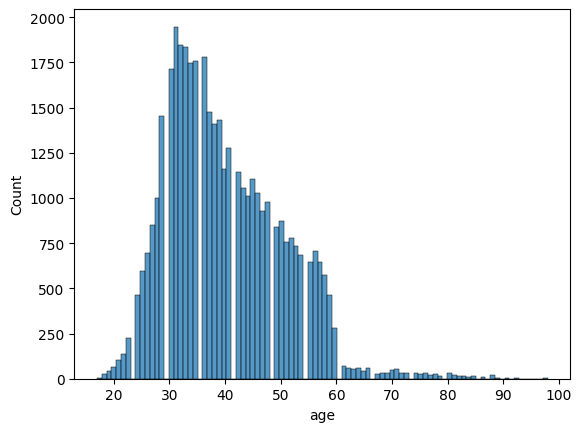

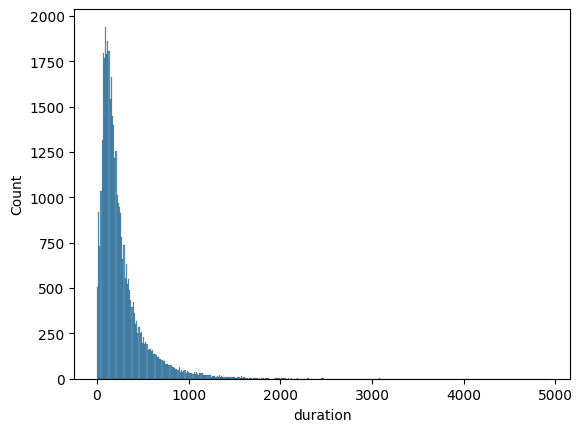

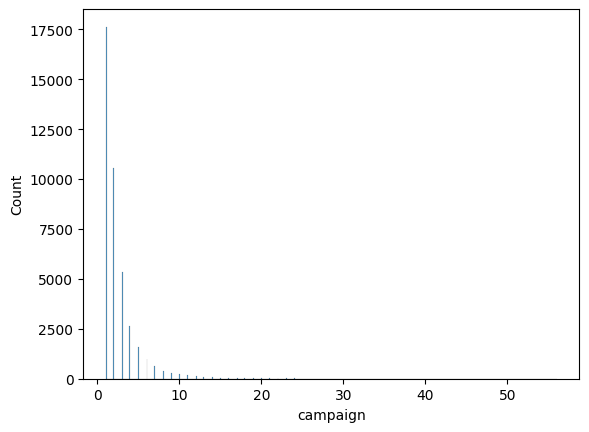

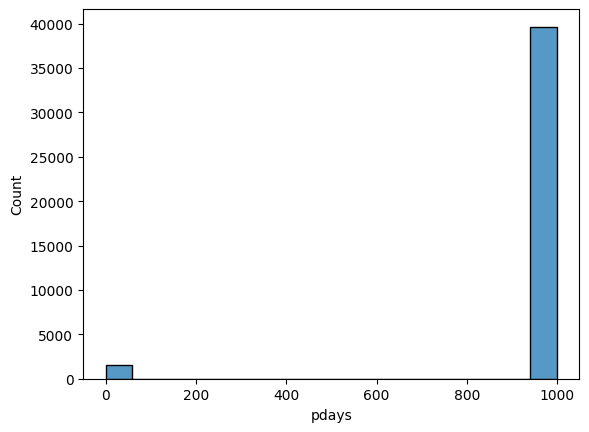

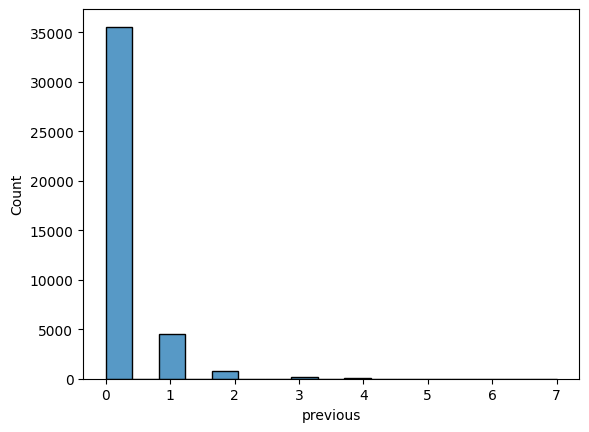

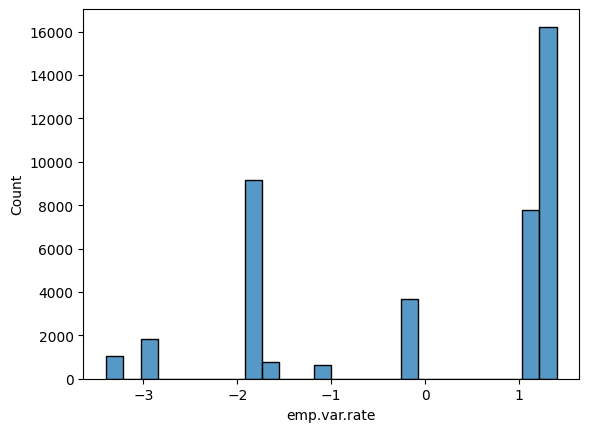

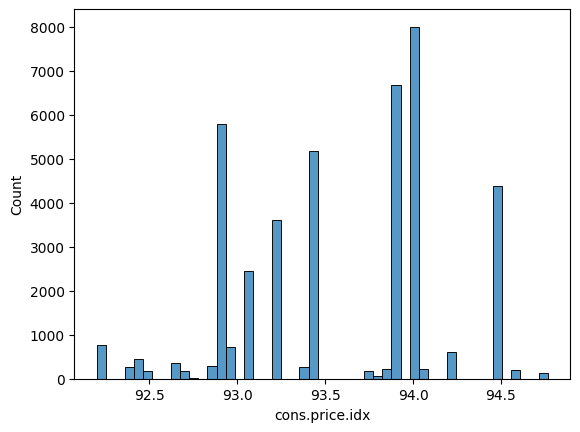

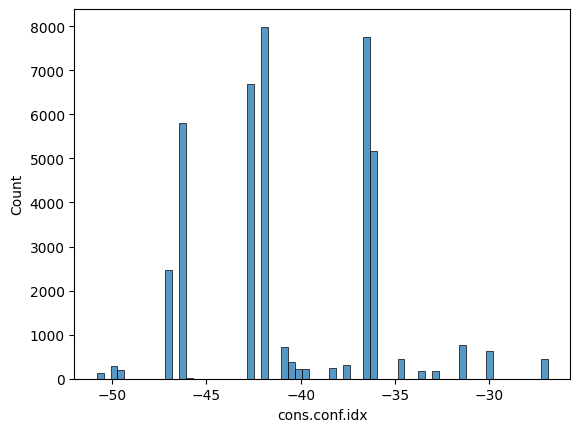

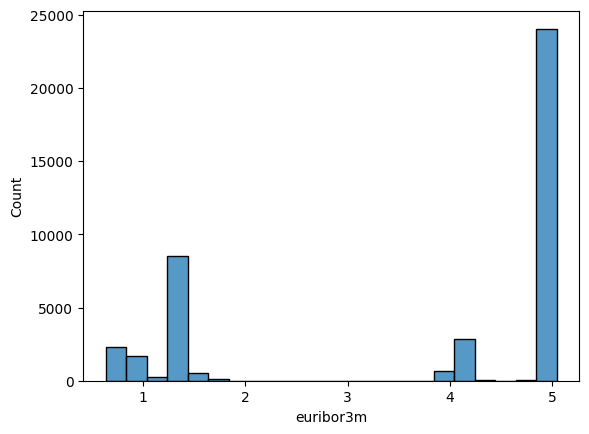

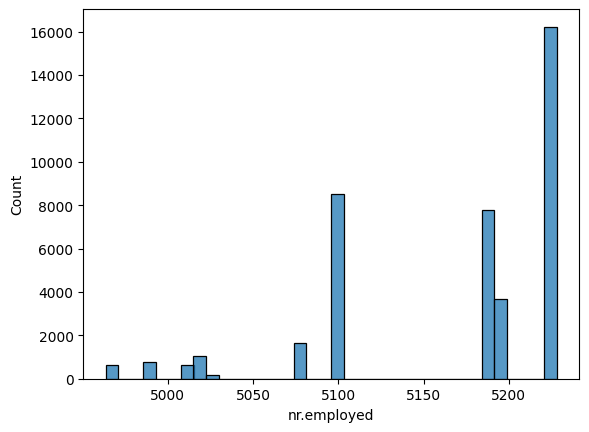

In [ ]:
# Histogram to understand the distribution

for i in clean_data.select_dtypes(include="number").columns:
  sns.histplot(data=clean_data,x=i)
  plt.show()

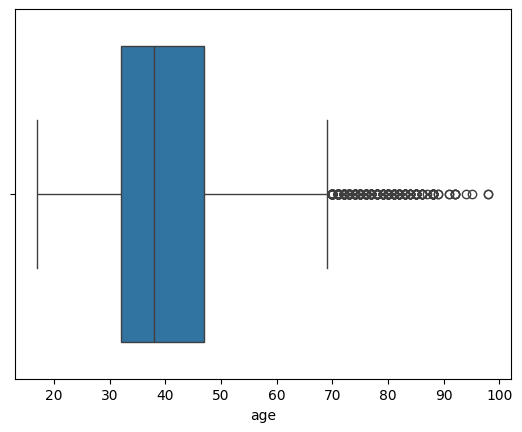

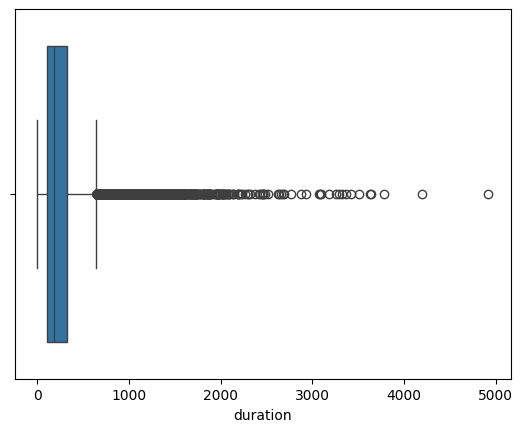

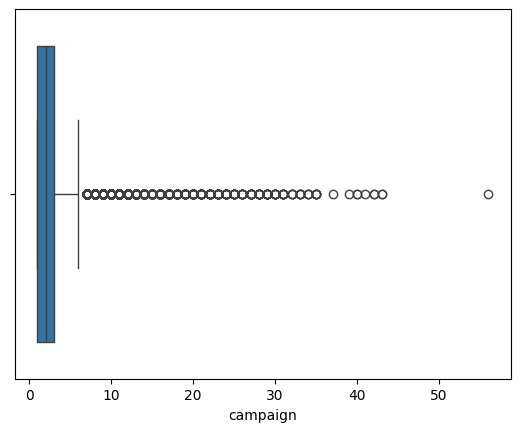

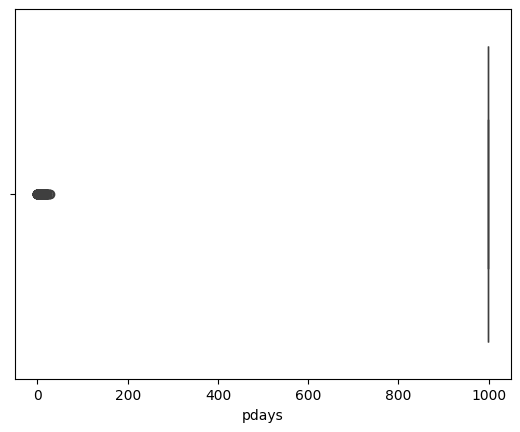

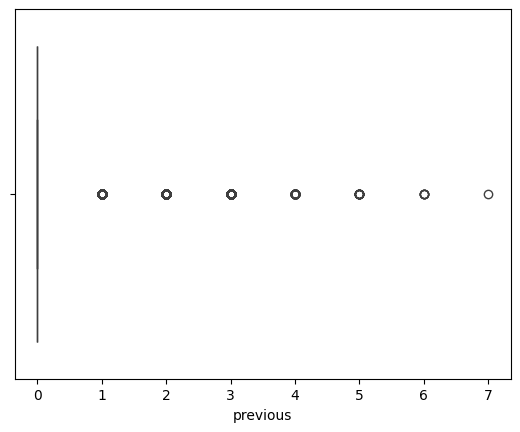

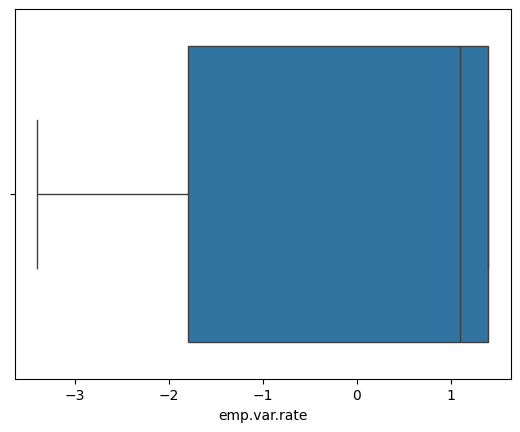

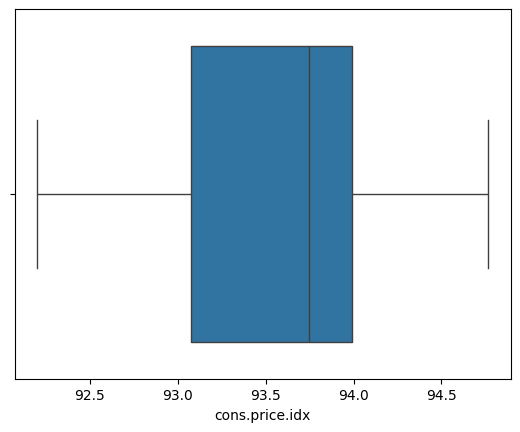

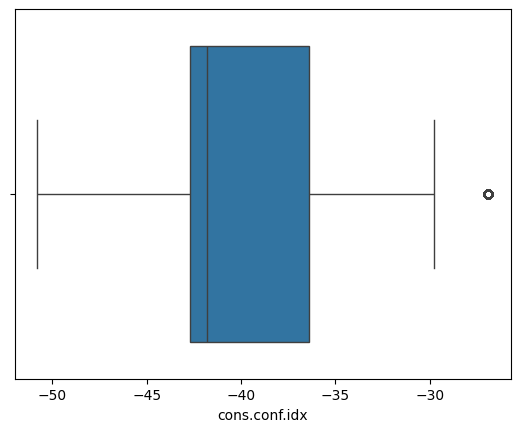

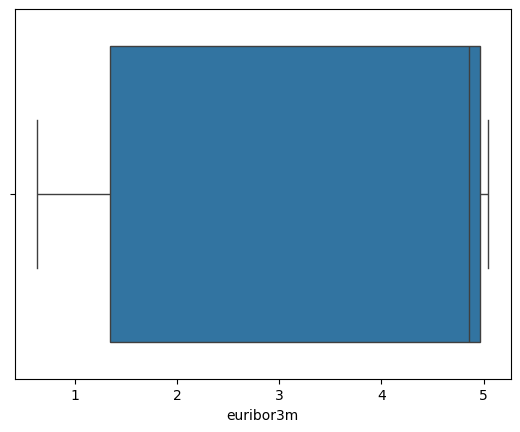

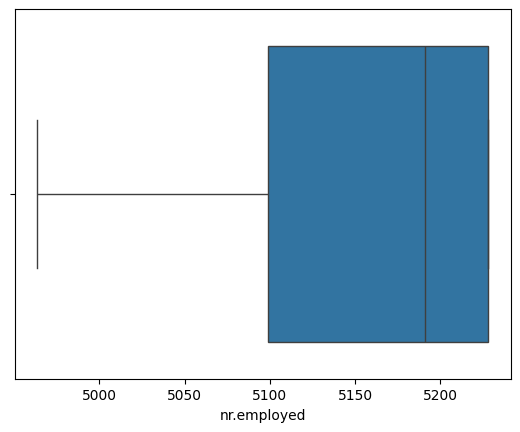

In [ ]:
# Boxplot(to identify the outliers)
for i in clean_data.select_dtypes(include="number").columns:
  sns.boxplot(data=clean_data,x=i)
  plt.show()


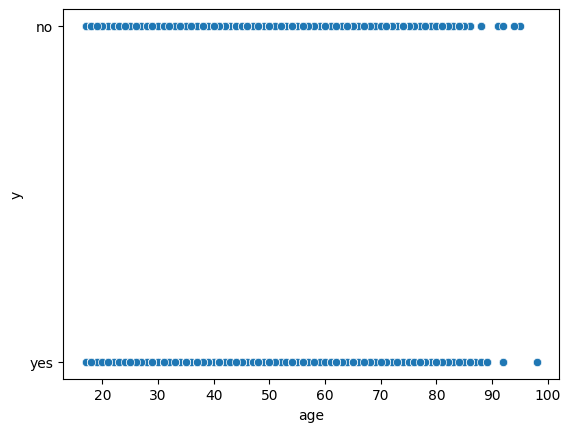

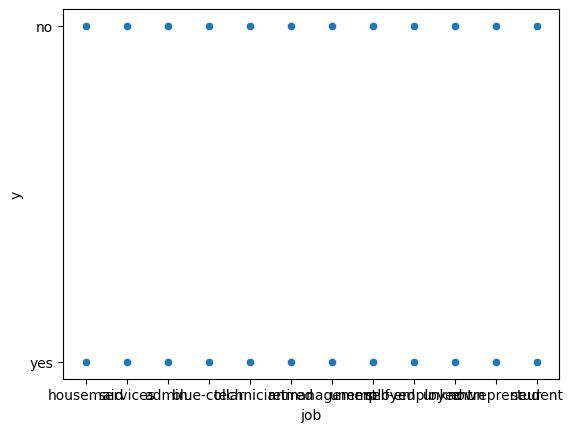

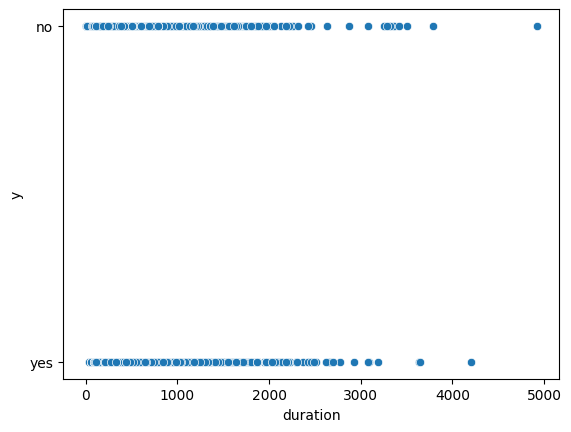

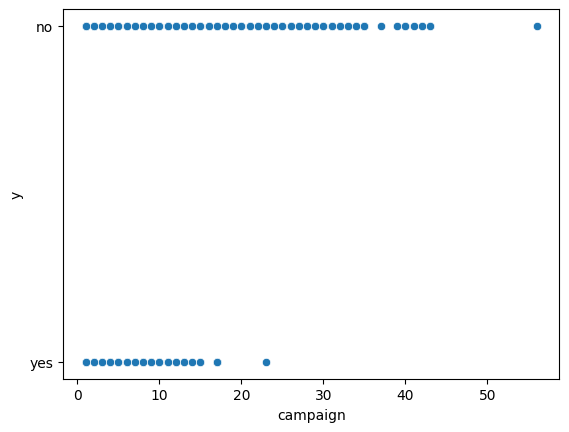

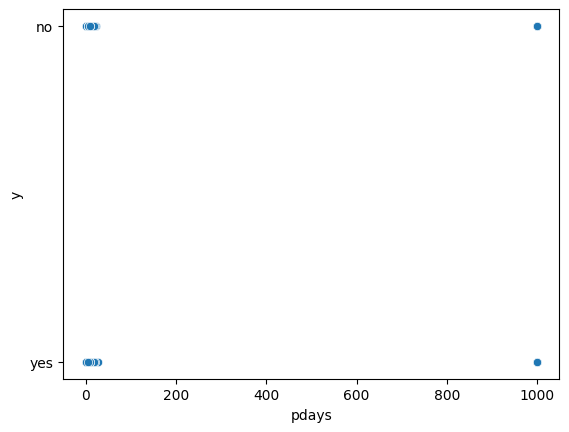

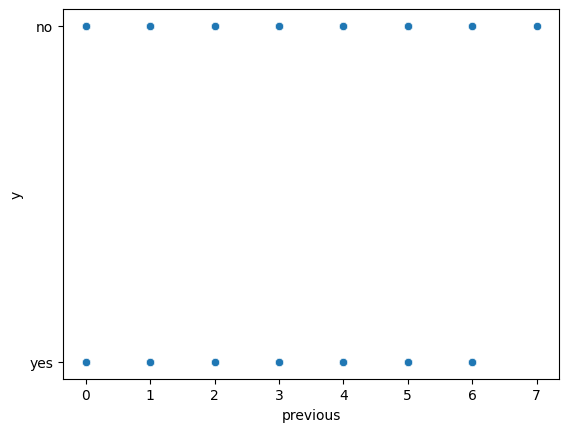

In [ ]:
# Scatter plot(to understand the relationship between independant variable and the target variable)
for i in ['age', 'job', 'duration', 'campaign', 'pdays', 'previous']:
    sns.scatterplot(data=clean_data,x=i,y="y") # This line and the next one should be indented

    plt.show()


In [ ]:
clean_data.select_dtypes(include="number").columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

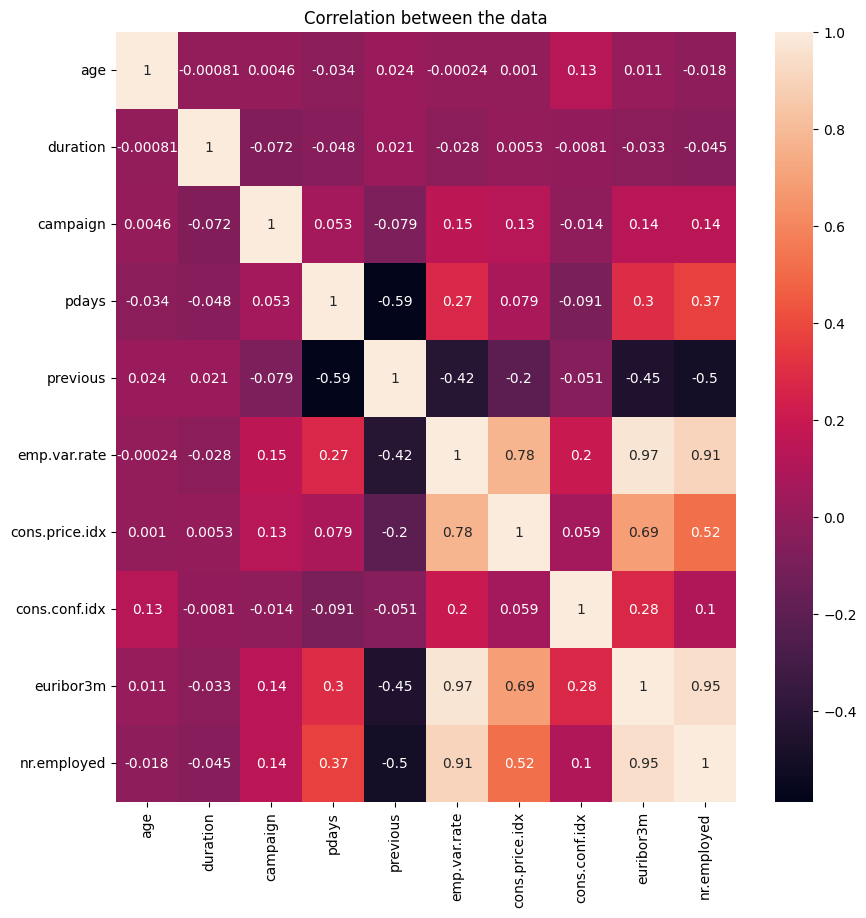

In [ ]:
# Corelation heatmap
s_1=clean_data.select_dtypes(include="number").corr()
plt.figure(figsize=(10,10))
plt.title("Correlation between the data")
sns.heatmap(s_1,annot=True)
plt.show()

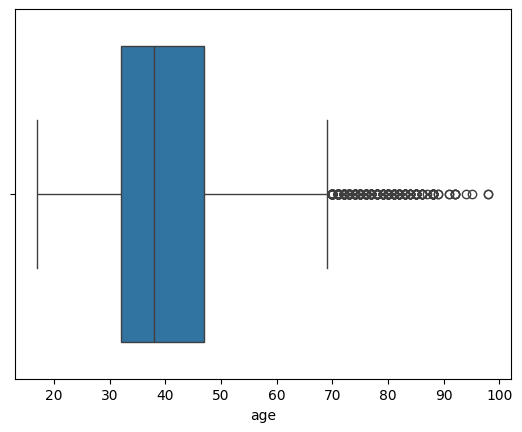

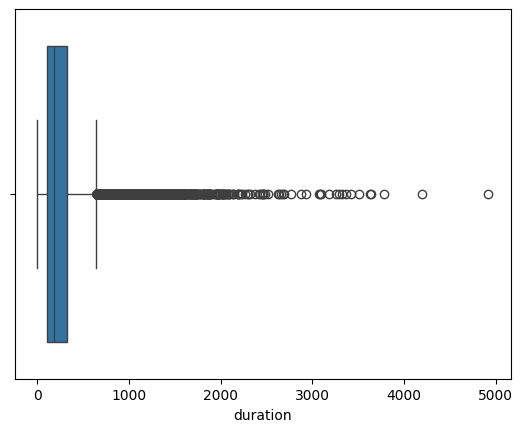

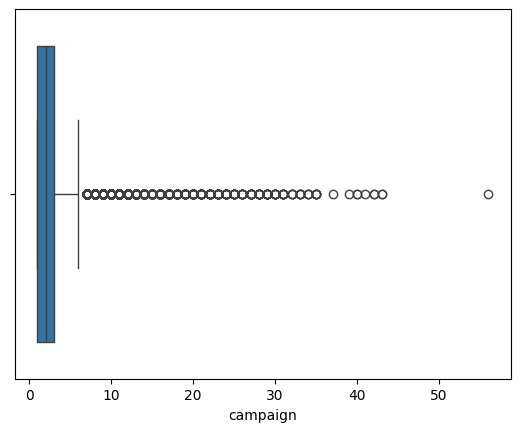

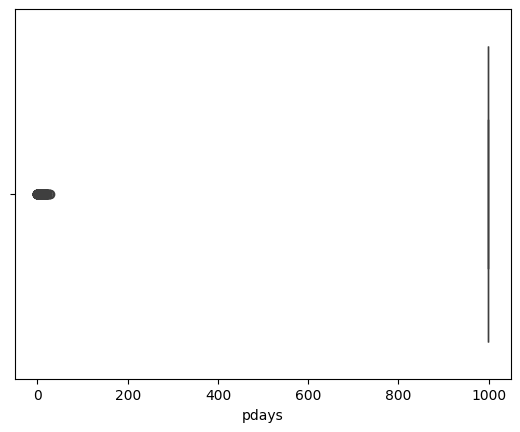

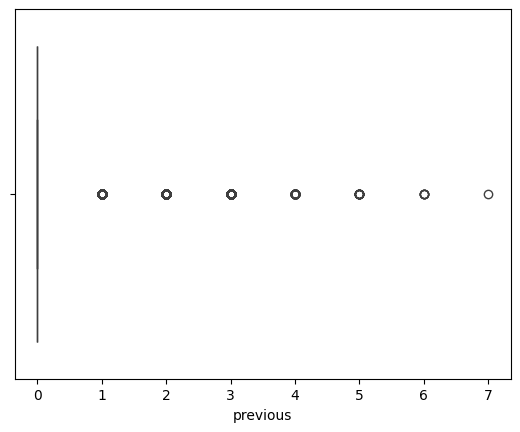

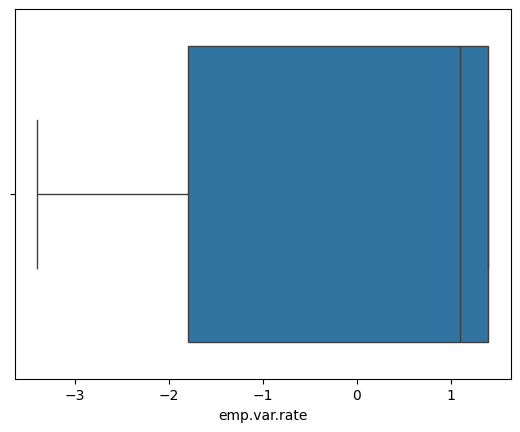

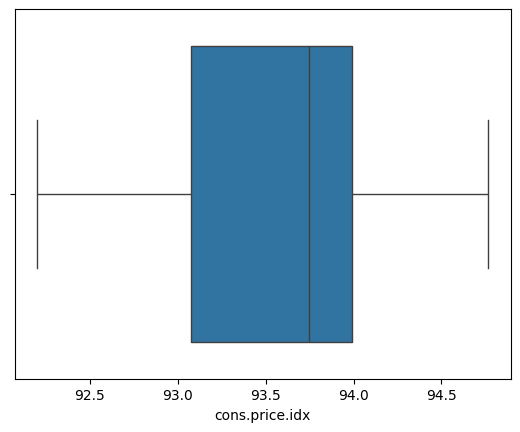

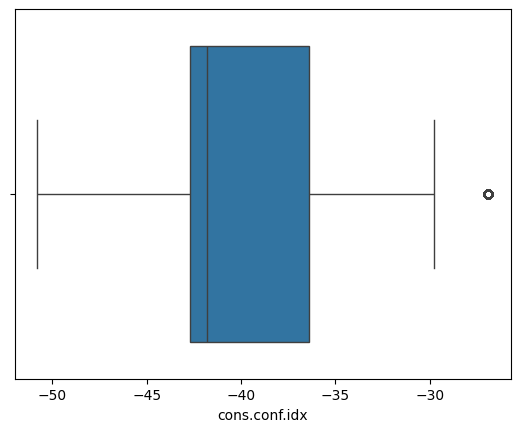

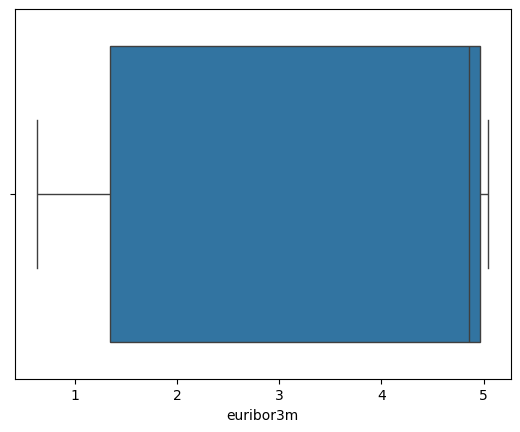

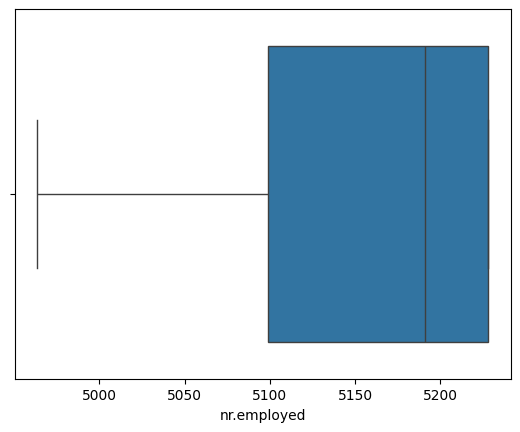

In [ ]:
for column in clean_data.select_dtypes(include="number").columns:
 sns.boxplot(data=clean_data,x=column)
 plt.show()

Encoding

In [ ]:
categorical_columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_encoded=pd.get_dummies(clean_data,columns=categorical_columns,drop_first=True)
data_encoded.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False


In [ ]:
# Encode the target variable ('y') as binary: 'yes' -> 1, 'no' -> 0
data_encoded['y'] = data_encoded['y'].map({'yes': 1, 'no': 0})


In [ ]:
#Outlier treatment: Capping

def cap_outliers(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    data[col] = np.where(data[col] < lower_whisker, lower_whisker,
                         np.where(data[col] > upper_whisker, upper_whisker, data[col]))
    print(f"Column {col}: Lower Whisker = {lower_whisker}, Upper Whisker = {upper_whisker}")

for column in ['age', 'duration', 'campaign', 'pdays', 'previous','cons.conf.idx','euribor3m','nr.employed']:
    cap_outliers(data_encoded, column)


Column age: Lower Whisker = 9.5, Upper Whisker = 69.5
Column duration: Lower Whisker = -223.5, Upper Whisker = 644.5
Column campaign: Lower Whisker = -2.0, Upper Whisker = 6.0
Column pdays: Lower Whisker = 999.0, Upper Whisker = 999.0
Column previous: Lower Whisker = 0.0, Upper Whisker = 0.0
Column cons.conf.idx: Lower Whisker = -52.150000000000006, Upper Whisker = -26.949999999999992
Column euribor3m: Lower Whisker = -4.081499999999999, Upper Whisker = 10.3865
Column nr.employed: Lower Whisker = 4905.6, Upper Whisker = 5421.6


In [ ]:
#Feature scaling
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous','cons.conf.idx','euribor3m','nr.employed']
scaler = StandardScaler()
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

In [ ]:
#Finding the correlation of the 'y' value
corr = data_encoded.corr()['y']
corr

,y
age,0.020918
duration,0.401306
campaign,-0.069397
pdays,NaN
previous,NaN
emp.var.rate,-0.298289
cons.price.idx,-0.136134
cons.conf.idx,0.054713
euribor3m,-0.307740
nr.employed,-0.354669


In [ ]:
data_encoded.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,1.585672,0.146471,-0.822576,0.0,0.0,1.1,93.994,0.88699,0.712463,0.331695,...,True,False,False,False,True,False,False,False,True,False
1,1.684402,-0.485000,-0.822576,0.0,0.0,1.1,93.994,0.88699,0.712463,0.331695,...,True,False,False,False,True,False,False,False,True,False
2,-0.290190,-0.050864,-0.822576,0.0,0.0,1.1,93.994,0.88699,0.712463,0.331695,...,True,False,False,False,True,False,False,False,True,False
3,0.005999,-0.473724,-0.822576,0.0,0.0,1.1,93.994,0.88699,0.712463,0.331695,...,True,False,False,False,True,False,False,False,True,False
4,1.585672,0.405826,-0.822576,0.0,0.0,1.1,93.994,0.88699,0.712463,0.331695,...,True,False,False,False,True,False,False,False,True,False


In [ ]:
#Removing all the data which has the least relationship with the 'y' value
data_encoded = data_encoded.drop(['campaign','pdays','previous','emp.var.rate','cons.price.idx','euribor3m','nr.employed','job_blue-collar','job_entrepreneur','job_housemaid','job_management','job_self-employeed','job_technician','job_unknown','marital_married','education_basic.6y,education_basic.9y','education_highschool','default_unknown','default_yes','housing_unknown','loan_unknown','loan_yes','contact_telephone','month_aug','moonth_jul','month_jun','month_may','month_nov','day_of _week_mon','poutcome_nonexistent'], axis=1, errors ='ignore')



In [ ]:
data_encoded.head()

,age,duration,cons.conf.idx,y,job_retired,job_self-employed,job_services,job_student,job_unemployed,marital_single,...,month_dec,month_jul,month_mar,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_success
0,1.585672,0.146471,0.88699,0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,1.684402,-0.485000,0.88699,0,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,-0.290190,-0.050864,0.88699,0,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0.005999,-0.473724,0.88699,0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1.585672,0.405826,0.88699,0,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
# Step 4: Split the Dataset into Training and Testing Sets
X = data_encoded.drop('y', axis=1)  # Features
y = data_encoded['y']               # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter


# Balancing dataset using SMOTE
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

print("Original training class distribution:", Counter(y_train))
print("Resampled training class distribution:", Counter(y_train_resampled))

Original training class distribution: Counter({0: 25576, 1: 3247})
Resampled training class distribution: Counter({0: 25576, 1: 25576})


In [ ]:
# Display final dataset information
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Target Distribution in Training Set:\n", y_train.value_counts(normalize=True))

Training Features Shape: (28823, 28)
Testing Features Shape: (12353, 28)
Target Distribution in Training Set:
 y
0    0.887347
1    0.112653
Name: proportion, dtype: float64


##Training Models

ANN Model

In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

In [ ]:
#Define Artificial Neural Network Architecture (Building the model)
bankad_ann= Sequential()
bankad_ann.add(Dense(32,activation='relu',input_dim=X_train_resampled.shape[1])) #32 neurons in this layer
bankad_ann.add(Dense(64,activation='relu')) #64 neurons
bankad_ann.add(Dense(1,activation='sigmoid'))  #Output layer for binary classification

In [ ]:
#Compile the model
bankad_ann.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
#Train the model
history=bankad_ann.fit(X_train_resampled,y_train_resampled,epochs=20,batch_size=32,validation_data=(X_test,y_test),verbose=1)

Epoch 1/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7959 - loss: 0.4384 - val_accuracy: 0.8233 - val_loss: 0.3879
Epoch 2/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8616 - loss: 0.3391 - val_accuracy: 0.8296 - val_loss: 0.3753
Epoch 3/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8694 - loss: 0.3230 - val_accuracy: 0.8315 - val_loss: 0.3809
Epoch 4/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8783 - loss: 0.3063 - val_accuracy: 0.8389 - val_loss: 0.3655
Epoch 5/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8806 - loss: 0.2981 - val_accuracy: 0.8464 - val_loss: 0.3470
Epoch 6/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8845 - loss: 0.2904 - val_accuracy: 0.8566 - val_loss: 0.3295
Epoch 7/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8899 - loss: 0.2797 - val_accuracy: 0.8450 - val_loss: 0.3504
Epoch 8/20
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8951 - loss: 0.2681 - 

In [ ]:
#Convert X_train and X_test values for Float32 values
X_train=X_train_resampled.astype('float32')
X_test=X_test.astype('float32')

In [ ]:
# Evaluate the Model
y_pred_nn = (bankad_ann.predict(X_test) > 0.5).astype(int)
print("Neural Network Evaluation:")
print(classification_report(y_test, y_pred_nn))
print("ROC-AUC Score:", roc_auc_score(y_test, bankad_ann.predict(X_test)))

387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Neural Network Evaluation:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     10961
           1       0.44      0.83      0.58      1392

    accuracy                           0.86     12353
   macro avg       0.71      0.85      0.75     12353
weighted avg       0.92      0.86      0.88     12353

387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
ROC-AUC Score: 0.9171307926116314


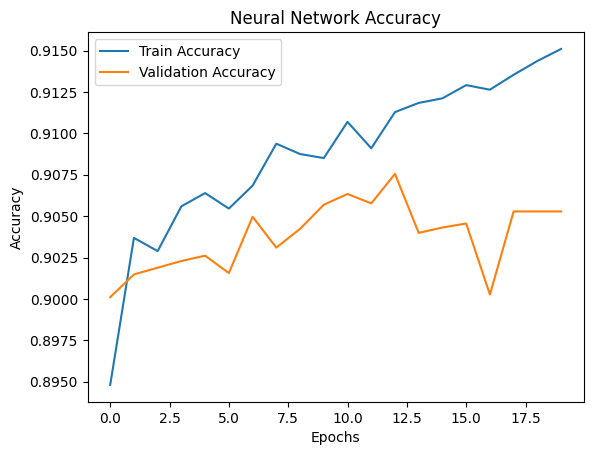

In [ ]:
# Plot Training and Validation Accuracy
plt.plot(history_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Neural Network Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

In [ ]:
# Define Random Forest Model
rf_bankad = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)

In [ ]:
# Train the Model
rf_bankad.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
# Predictions on training and testing sets
y_train_pred_1 = rf_bankad.predict(X_train)
y_pred_rf_1 = rf_bankad.predict(X_test)

In [ ]:
# Evaluate the Model

print("Random Forest Evaluation:")
print(classification_report(y_test, y_pred_rf_1))
print("ROC-AUC Score:", roc_auc_score(y_test, rf_bankad.predict_proba(X_test)[:, 1]))

Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.97      0.88      0.93     10961
           1       0.47      0.81      0.59      1392

    accuracy                           0.87     12353
   macro avg       0.72      0.85      0.76     12353
weighted avg       0.92      0.87      0.89     12353

ROC-AUC Score: 0.9239104133044326


In [ ]:
# Calculate accuracy for training and validation sets
train_accuracy_1 = accuracy_score(y_train, y_train_pred_1)
test_accuracy_1 = accuracy_score(y_test, y_pred_rf_1)


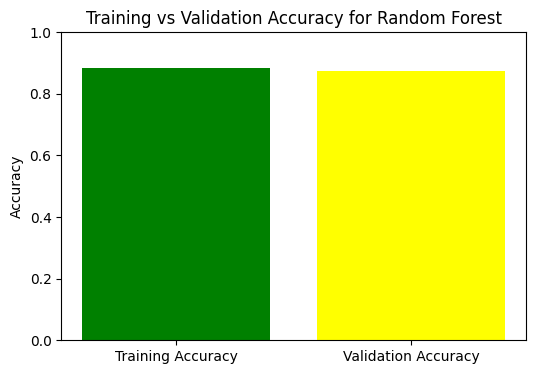

Training Accuracy: 0.8836
Validation Accuracy: 0.8742


In [ ]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Training Accuracy', 'Validation Accuracy'], [train_accuracy_1, test_accuracy_1], color=['green', 'yellow'])
plt.ylim(0, 1)
plt.title('Training vs Validation Accuracy for Random Forest')
plt.ylabel('Accuracy')
plt.show()

# Print accuracy values
print(f"Training Accuracy: {train_accuracy_1:.4f}")
print(f"Validation Accuracy: {test_accuracy_1:.4f}")

Comparison between the models

In [ ]:
print("Model Comparison:")
print("Neural Network ROC-AUC:", roc_auc_score(y_test, bankad_ann.predict(X_test)))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, rf_bankad.predict_proba(X_test)[:, 1]))


Model Comparison:
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Neural Network ROC-AUC: 0.9171307926116314
Random Forest ROC-AUC: 0.9239104133044326


Visualizing results

In [ ]:
# Compute ROC-AUC scores
roc_auc_nn_1 = roc_auc_score(y_test, bankad_ann.predict(X_test))
roc_auc_rf_1 = roc_auc_score(y_test, rf_bankad.predict_proba(X_test)[:, 1])


387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# Data for the graph
models_1 = ['Neural Network', 'Random Forest']
roc_auc_scores_1 = [roc_auc_nn_1, roc_auc_rf_1]


(0.0, 1.0)

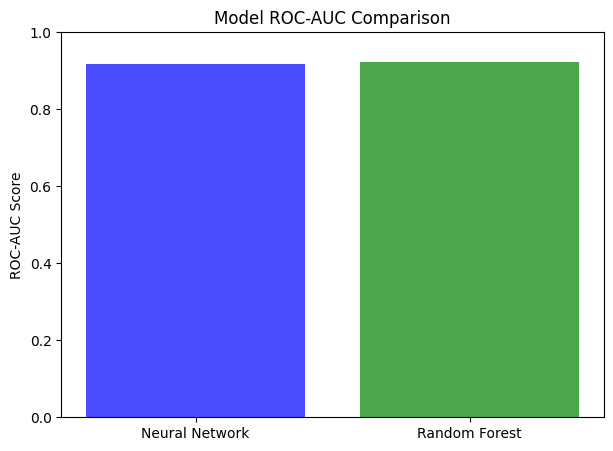

In [ ]:
# Plot the graph
plt.figure(figsize=(7, 5))
bars = plt.bar(models_1, roc_auc_scores_1, color=['blue', 'green'], alpha=0.7)
plt.title('Model ROC-AUC Comparison')
plt.ylabel('ROC-AUC Score')
plt.ylim(0, 1)